Lost of repetitive code with the notebook in data_5labels. Its just because I rather copy paste then re-run sections. I feel like if I don't keep the other notebook the way it is, im just going to forget why im creating this dataset in the first place.

In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

In [24]:
data_train=pd.read_csv('train.tsv',delimiter='\t')
data_test=pd.read_csv('test.tsv',delimiter='\t')

print("train: ", data_train.shape)
print("test: ", data_test.shape)

train:  (156060, 4)
test:  (66292, 3)


### Train

In [25]:
cols = ['PhraseId', 'Sentiment', 'SentenceId', 'Phrase']
data_train = data_train[cols]

In [26]:
data_train = data_train.rename(columns={'PhraseId':'id', 'Sentiment': 'label', 'SentenceId':'alpha', 'Phrase':'text'})
data_train['alpha'] = "a"

In [27]:
data_train.head(3)

,id,label,alpha,text
0,1,1,a,A series of escapades demonstrating the adage ...
1,2,2,a,A series of escapades demonstrating the adage ...
2,3,2,a,A series


In [28]:
data_train['label'].unique()

array([1, 2, 3, 4, 0])

In [29]:
# going to merge 0,1 and 3,4
def relabel(label):
    label = int(label)
    if label < 2:
        return 0
    elif label == 2:
        return 1
    else:
        return 2

data_train['label'] = data_train['label'].apply(relabel)
data_train['label'].unique()

array([0, 1, 2])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

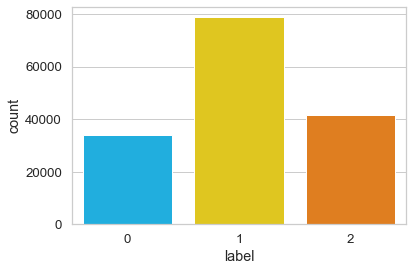

In [32]:
sns.countplot(data_train['label'])

Okay this is a better balance than before but definitely not great. BUT it is a gigantic dataset

In [30]:
data_train, data_val = train_test_split(data_train, test_size=0.01)
print("train: ", data_train.shape)
print("val: ", data_val.shape)

train:  (154499, 4)
val:  (1561, 4)


### Test

In [31]:
data_test = data_test.rename(columns={'PhraseId':'id', 'Phrase':'text'})
data_test = data_test.drop('SentenceId', axis=1)
data_test.head(3)

,id,text
0,156061,An intermittently pleasing but mostly routine ...
1,156062,An intermittently pleasing but mostly routine ...
2,156063,An


### Save dataframes to File

In [33]:
data_train.to_csv('train.tsv', sep='\t', index=False, header=False)
data_val.to_csv('val.tsv', sep='\t', index=False, header=False)
data_test.to_csv('test.tsv', sep='\t', index=False, header=True)